In [1]:
import sys
sys.path.append("../../BayesFlow")
sys.path.append("../")

import os
if "KERAS_BACKEND" not in os.environ:
    # set this to "torch", "tensorflow", or "jax"
    os.environ["KERAS_BACKEND"] = "torch"

import numpy as np
import pickle

import keras

In [2]:
import bayesflow as bf
from dmc import DMC, dmc_helpers


with torch.enable_grad():
in contexts where you need gradients (e.g. custom training loops).


In [3]:
simulator = DMC(
    prior_means=np.array([16., 111., 0.5, 322., 75.]), 
    prior_sds=np.array([10., 47., 0.13, 40., 23.]),
    tmax=1500
)


In [4]:
approximator = keras.saving.load_model("../checkpoints/optuna_run1.keras")

/home/space/anaconda3/envs/bf/lib/python3.11/site-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)


In [5]:
import pandas as pd

narrow_data = pd.read_csv('../data/model_data/experiment_data_narrow.csv')
wide_data = pd.read_csv('../data/model_data/experiment_data_wide.csv')

empirical_data = pd.concat([narrow_data, wide_data])

In [6]:
samples_narrow=dmc_helpers.fit_empirical_data(narrow_data, approximator)

samples_narrow["spacing"]="narrow"

samples_wide=dmc_helpers.fit_empirical_data(wide_data, approximator)

samples_wide["spacing"]="wide"


data_complete=pd.concat((samples_wide, samples_narrow))

In [7]:
parts=data_complete["participant"].unique()

data_complete

,A,tau,mu_c,t0,b,participant,sampling_time,spacing
0,9.030750,89.165985,0.570006,283.235596,78.070099,1108,0.017476,wide
1,5.366776,129.963043,0.554997,281.862213,77.193336,1108,0.017476,wide
2,3.268147,112.485741,0.525871,283.656586,71.665512,1108,0.017476,wide
3,9.813831,72.987625,0.518446,283.884491,72.024734,1108,0.017476,wide
4,8.614408,144.185455,0.497316,281.257141,71.263542,1108,0.017476,wide
...,...,...,...,...,...,...,...,...
995,14.667790,156.453033,0.633320,313.005188,83.181229,337788,0.017090,narrow
996,22.721596,156.989716,0.694127,314.588959,98.284401,337788,0.017090,narrow
997,16.125271,125.240410,0.650542,311.045776,93.535690,337788,0.017090,narrow
998,16.479042,104.828812,0.659357,313.136841,94.965874,337788,0.017090,narrow


/tmp/ipykernel_9160/3701706333.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1,5, figsize=(15,3))


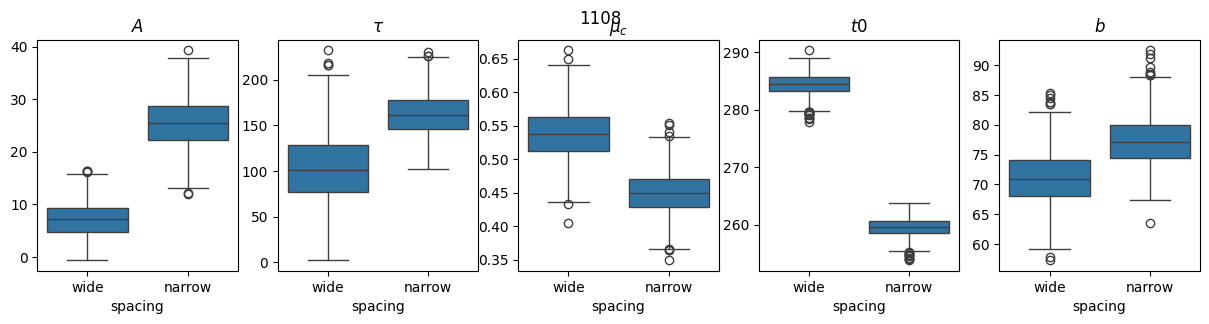

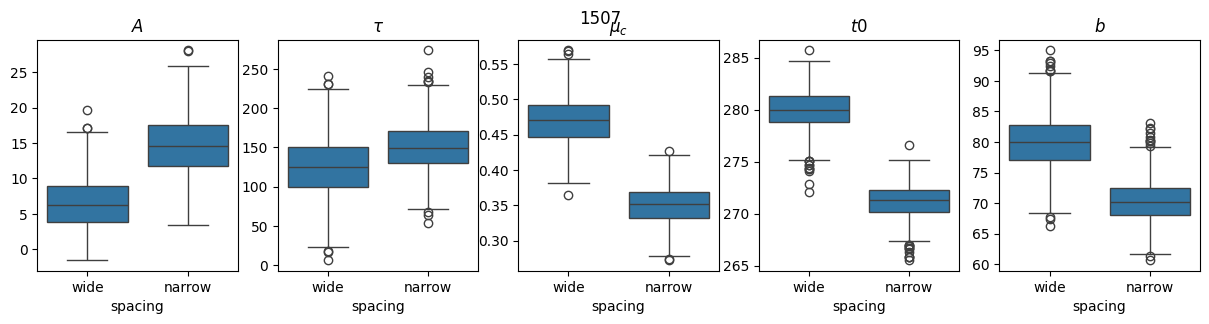

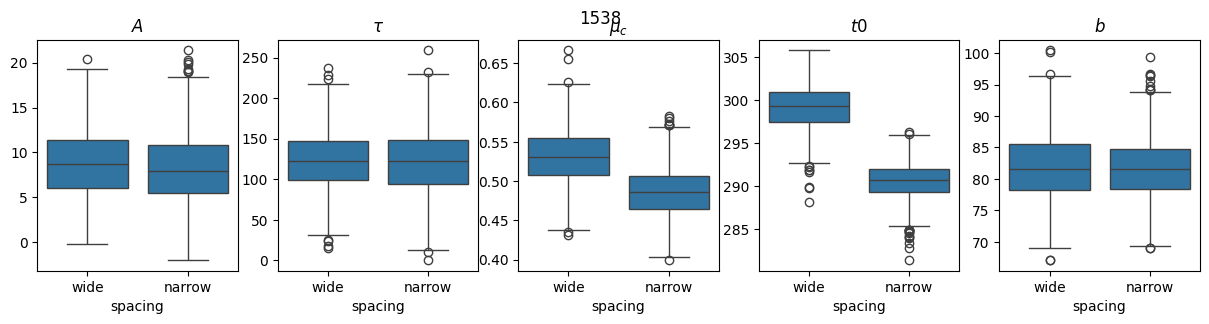

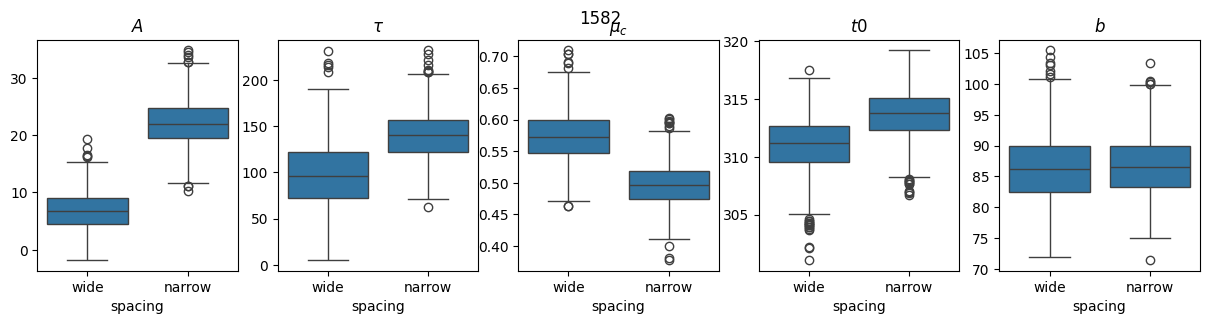

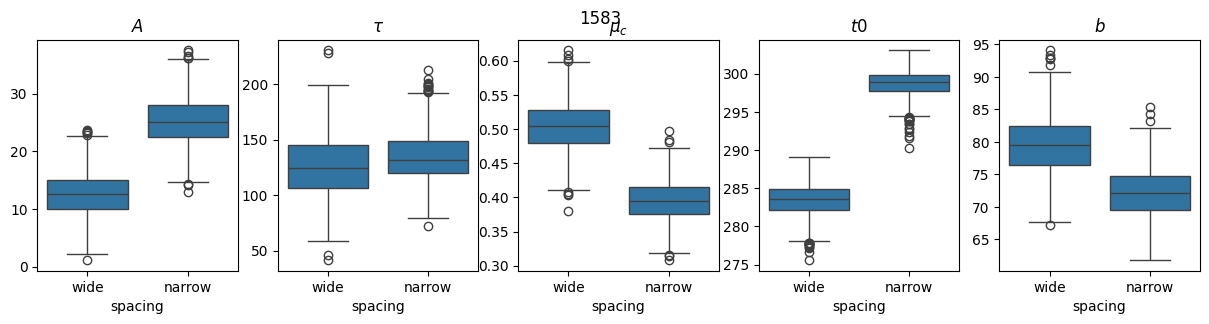

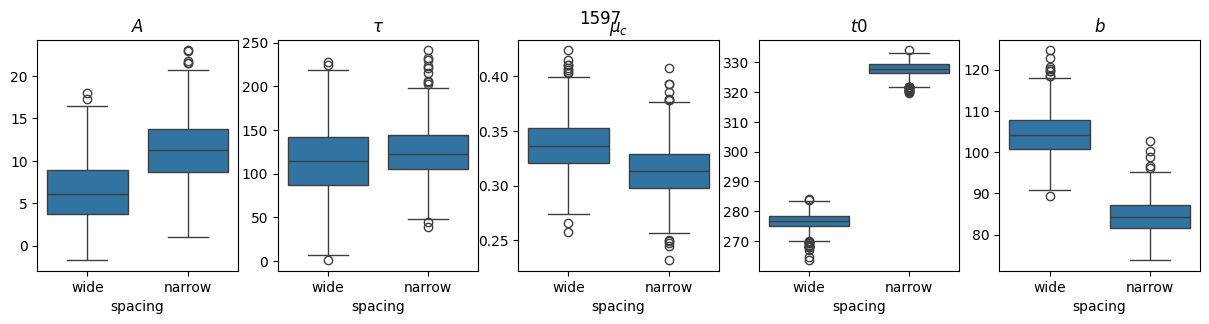

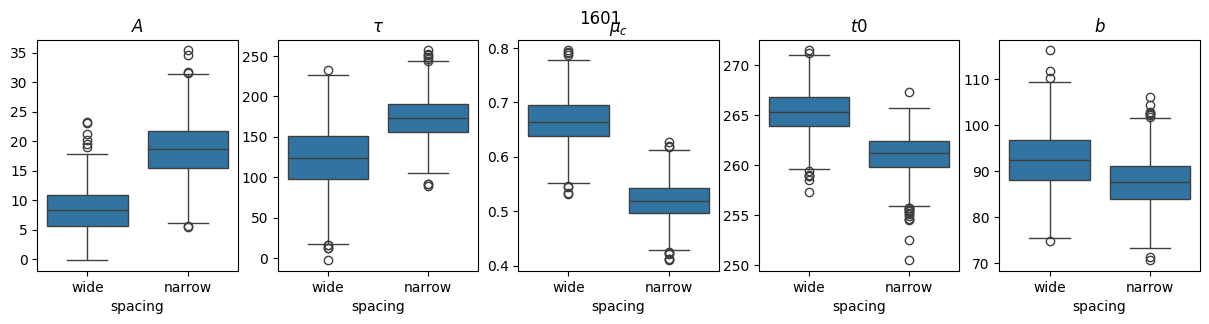

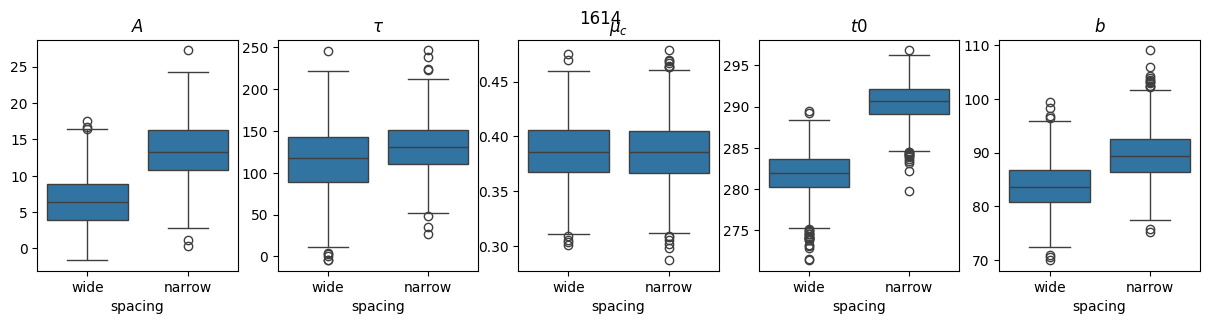

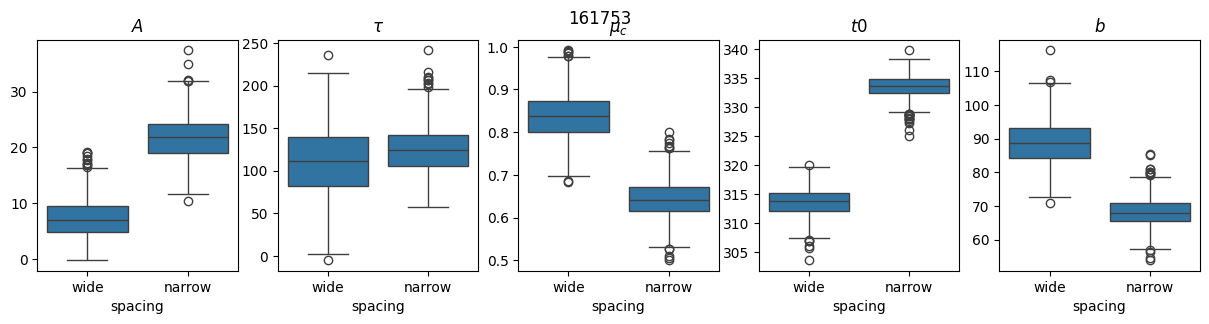

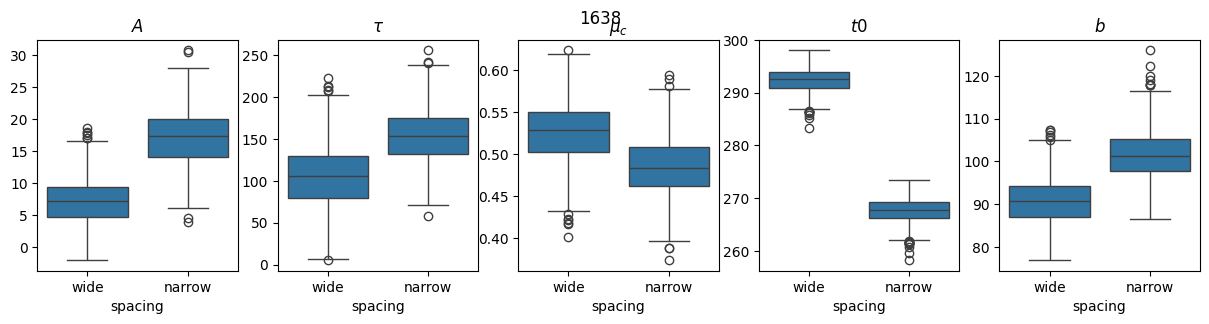

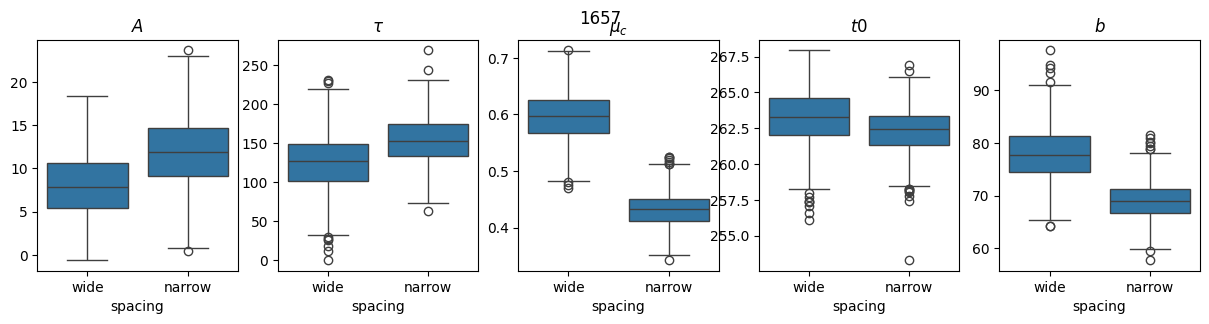

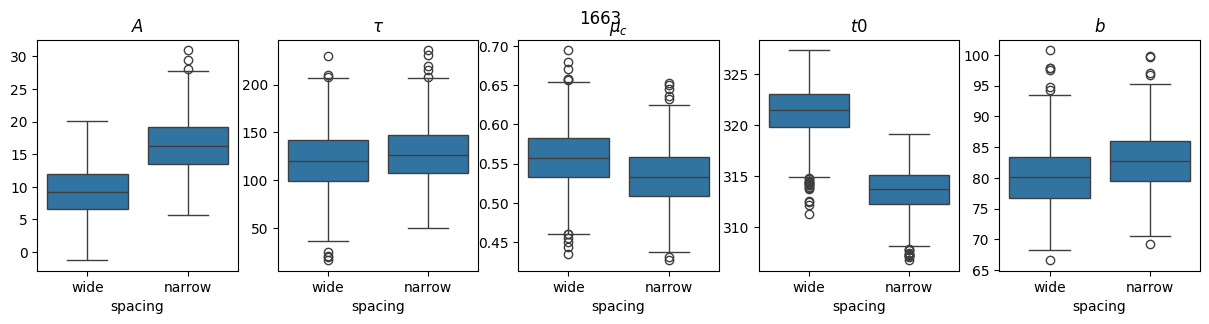

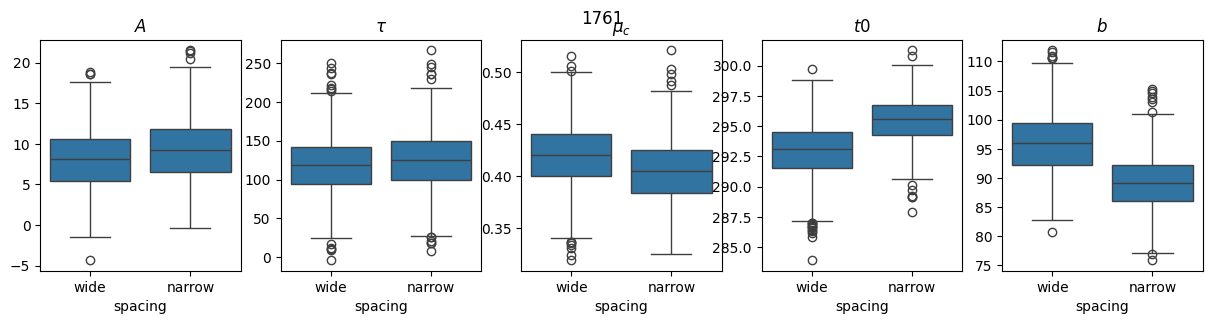

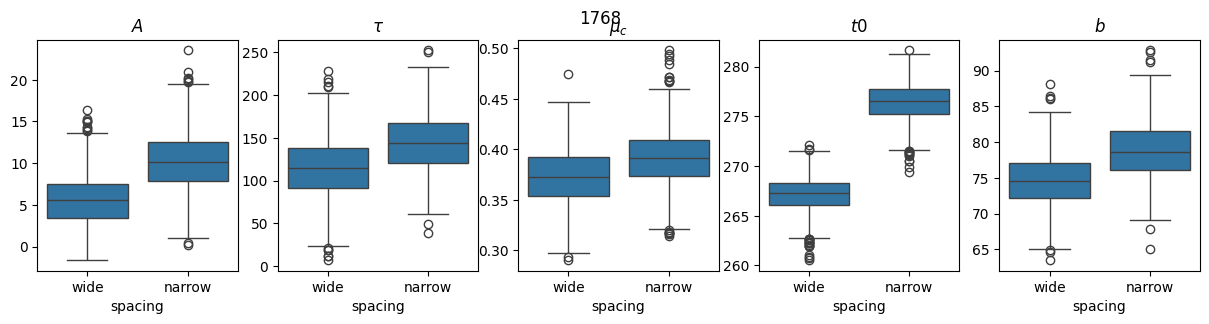

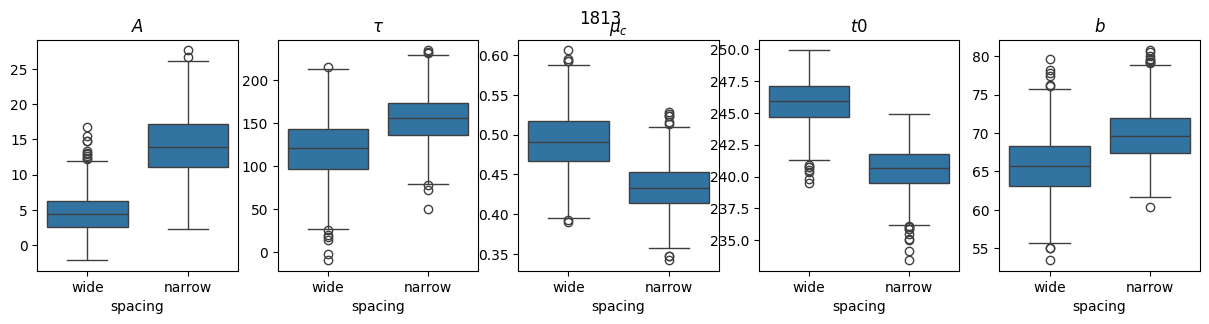

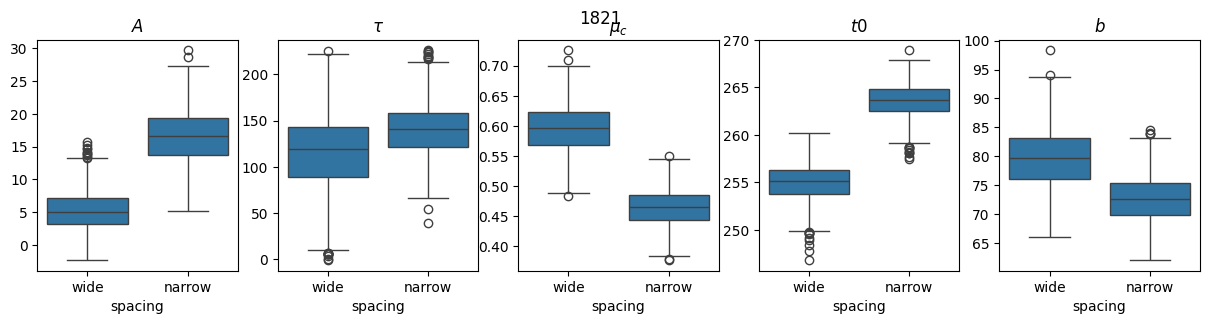

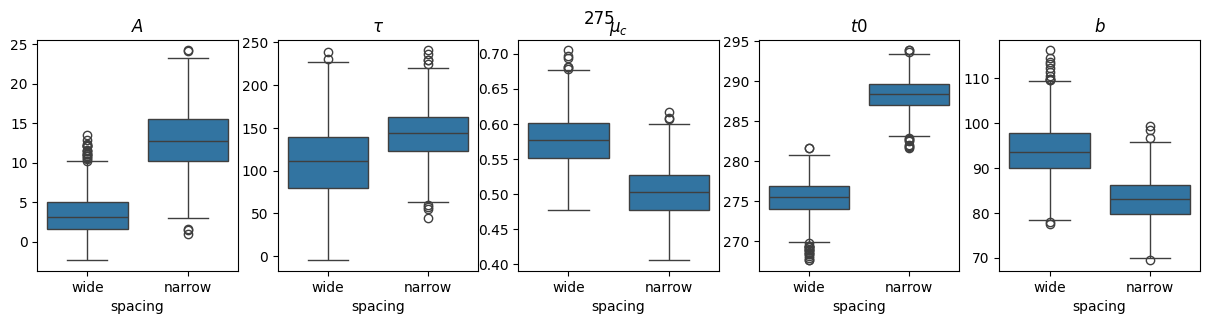

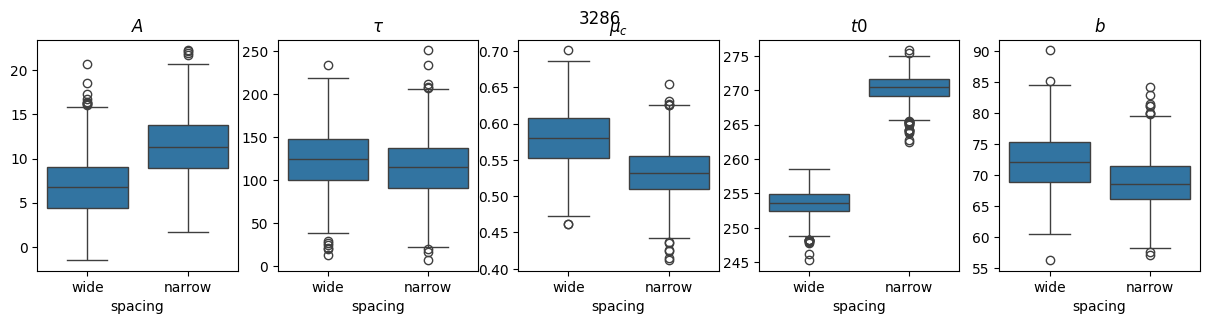

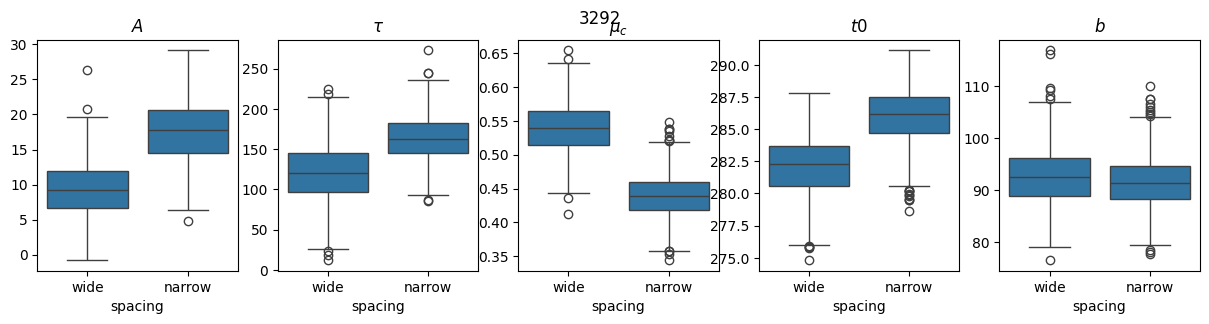

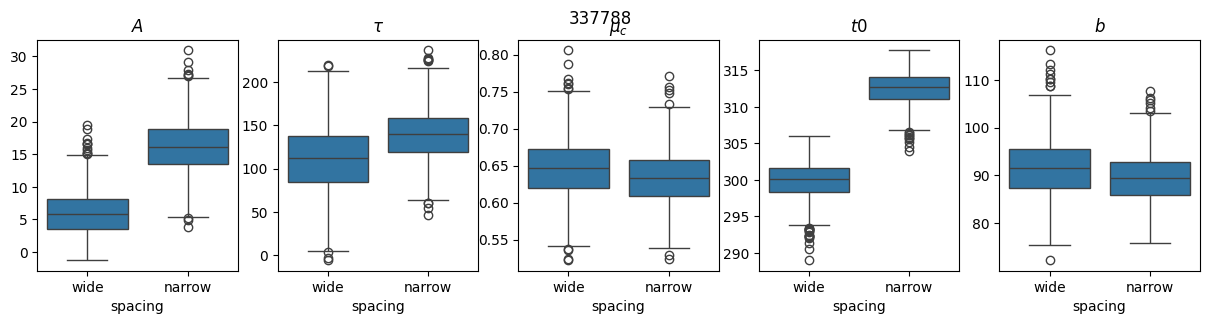

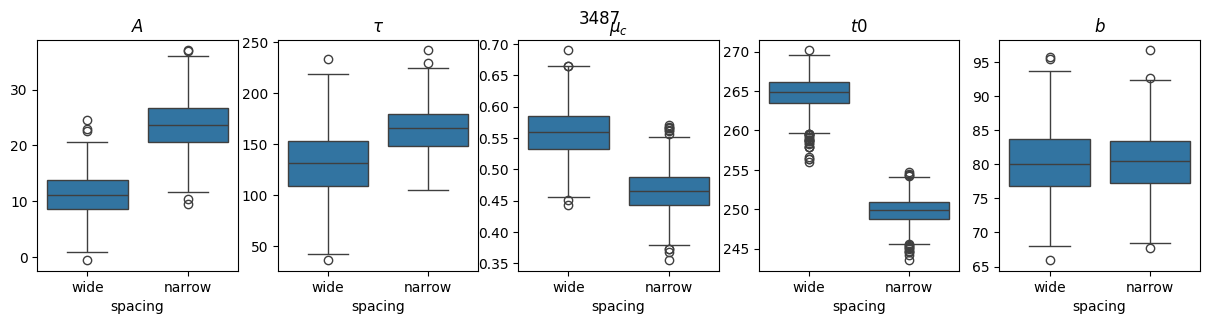

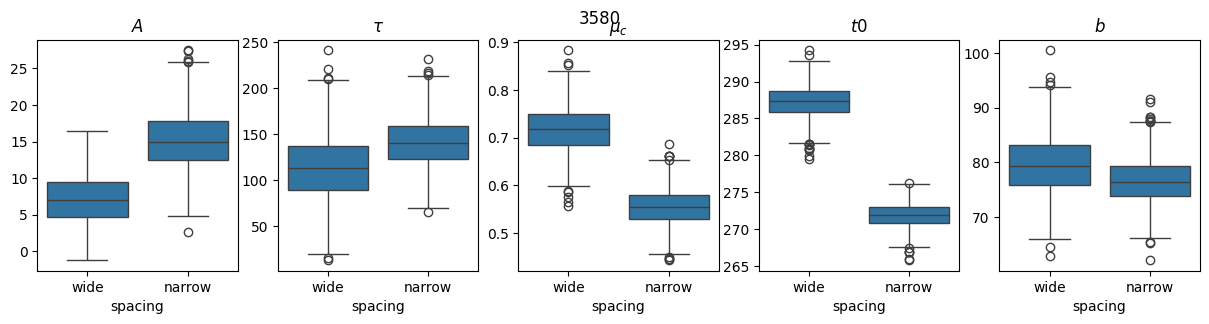

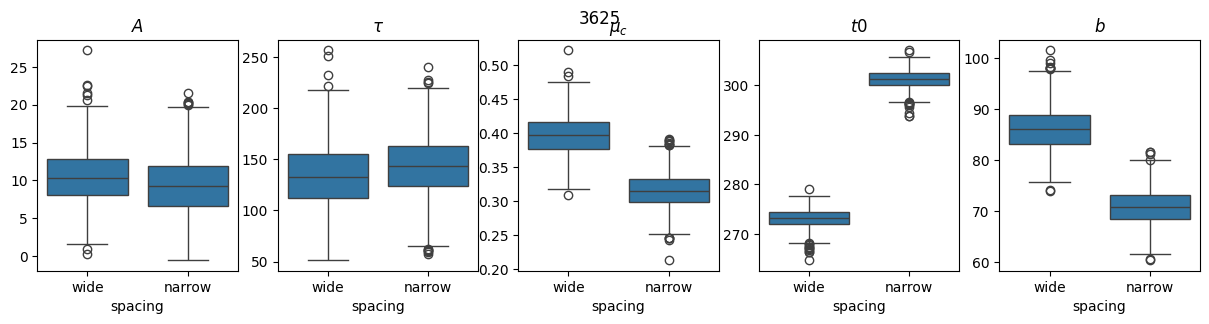

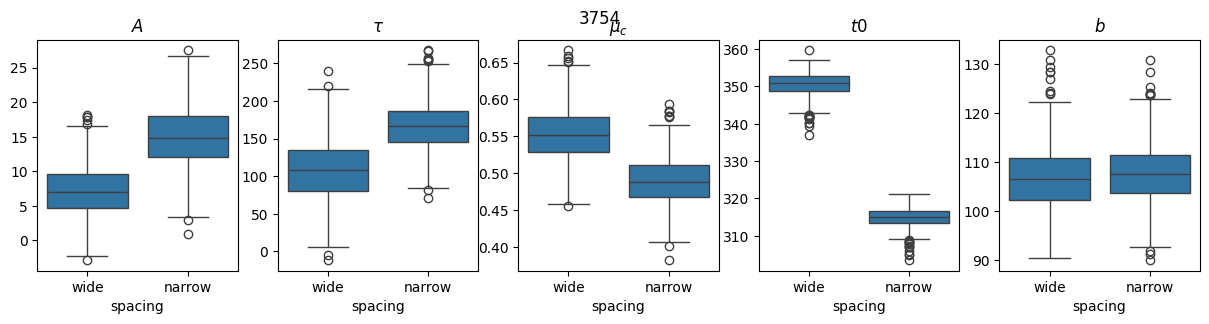

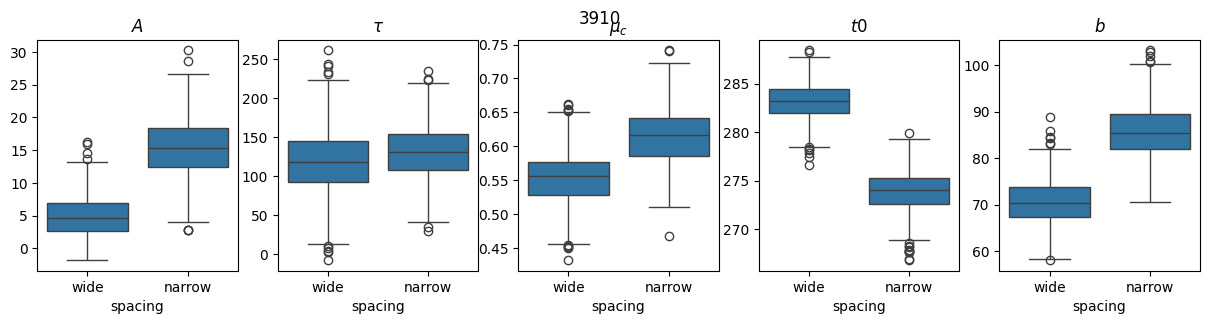

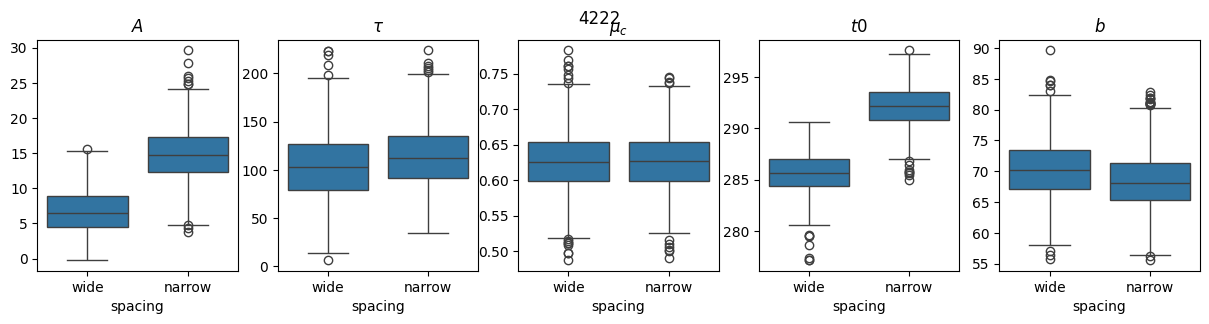

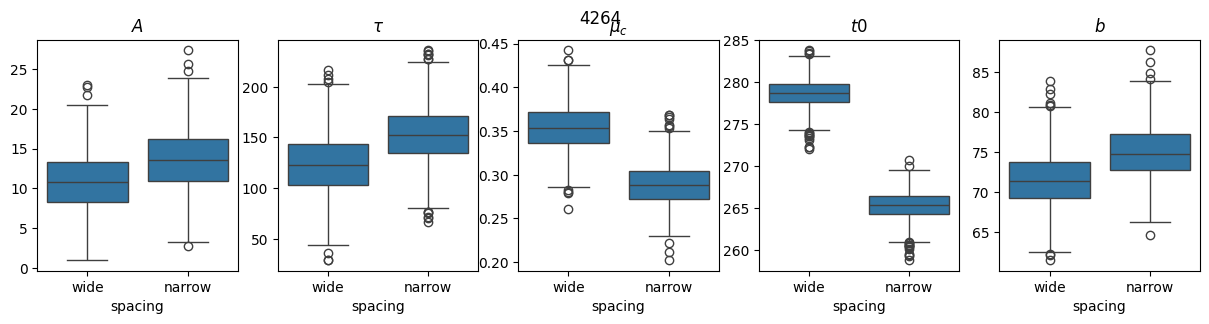

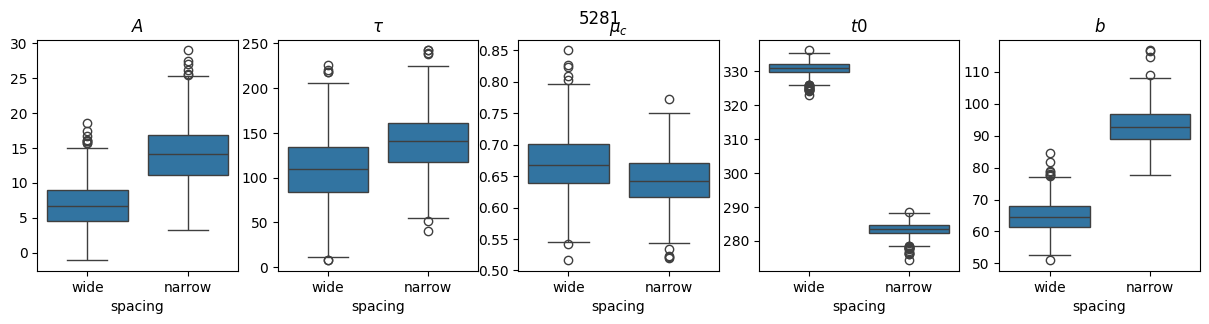

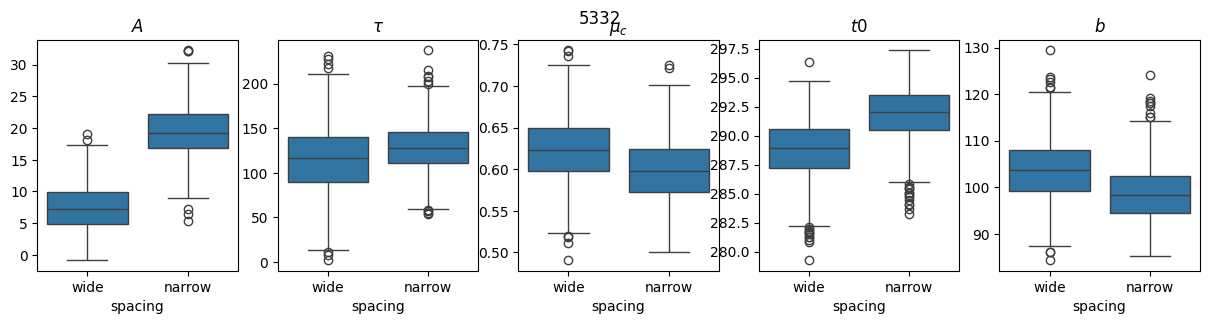

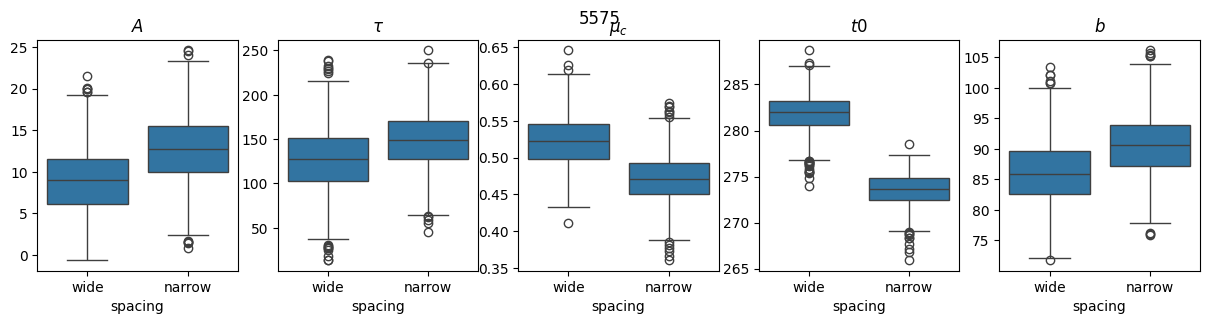

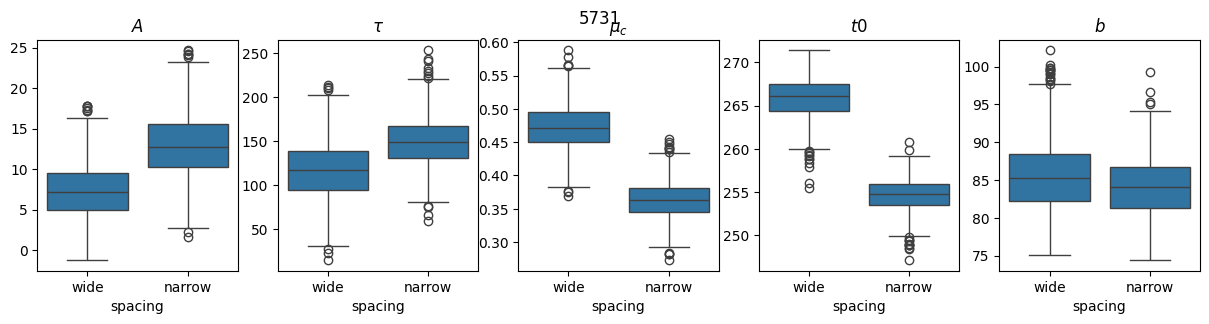

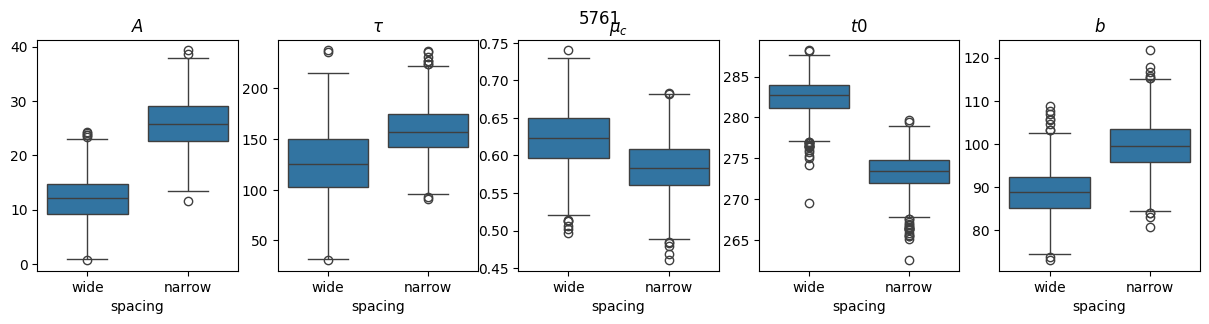

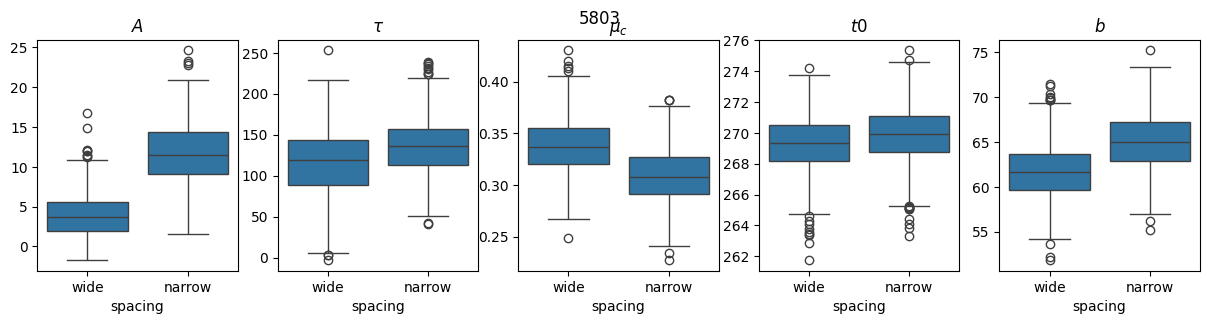

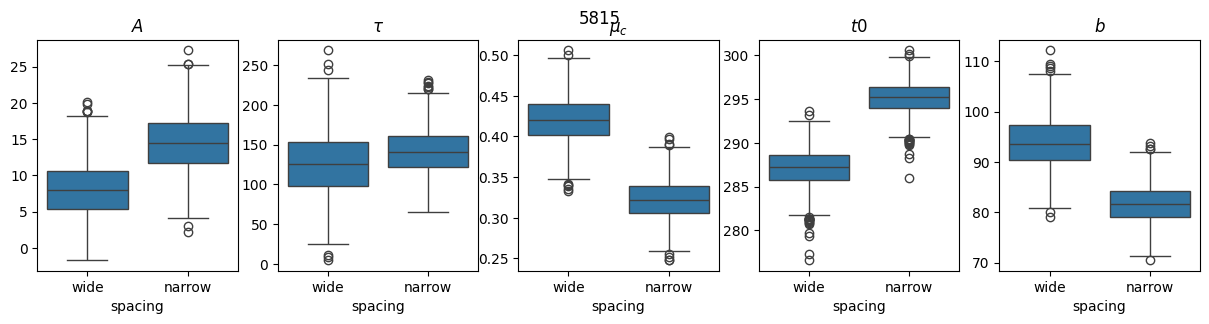

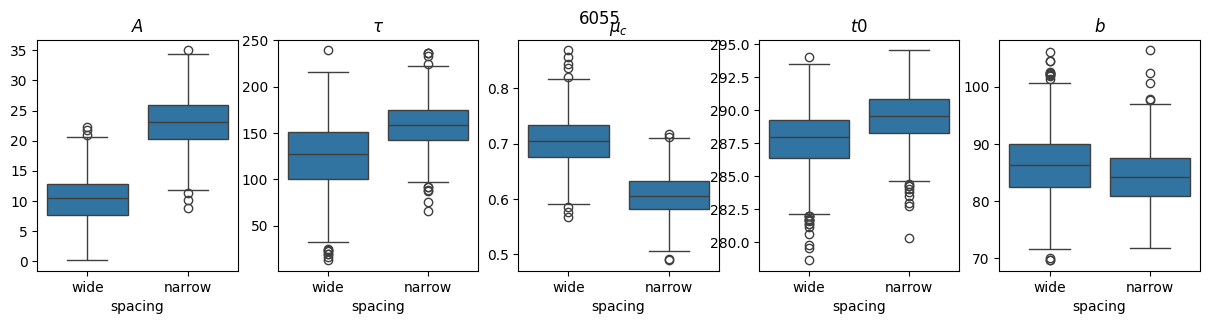

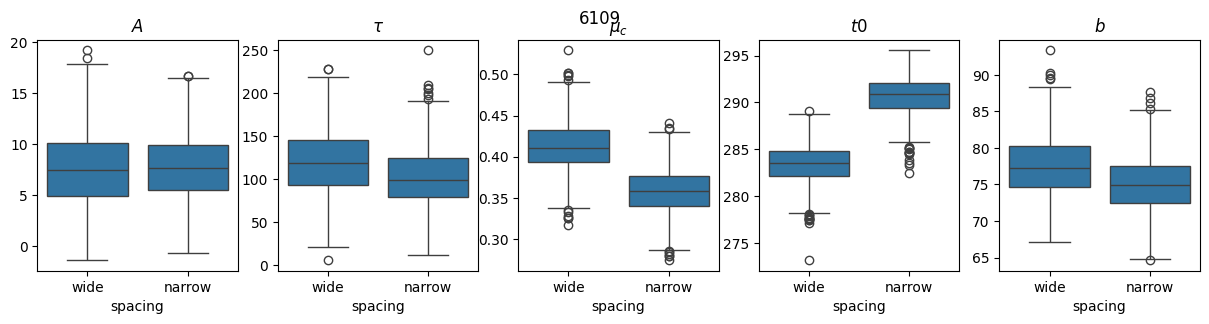

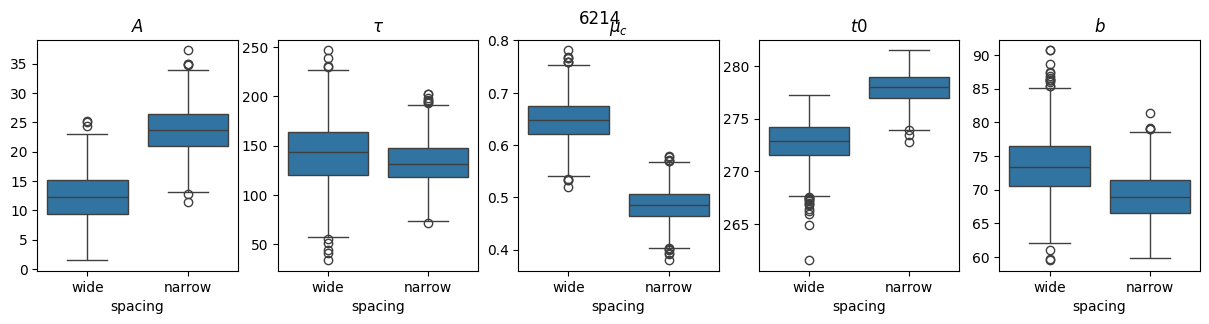

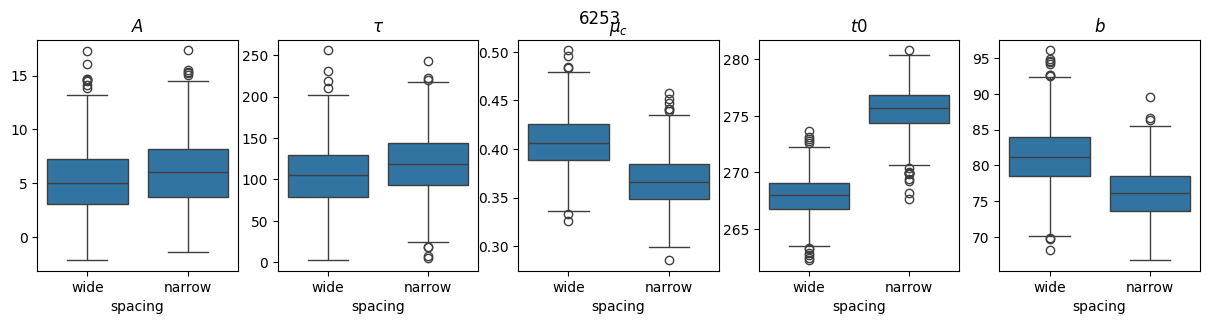

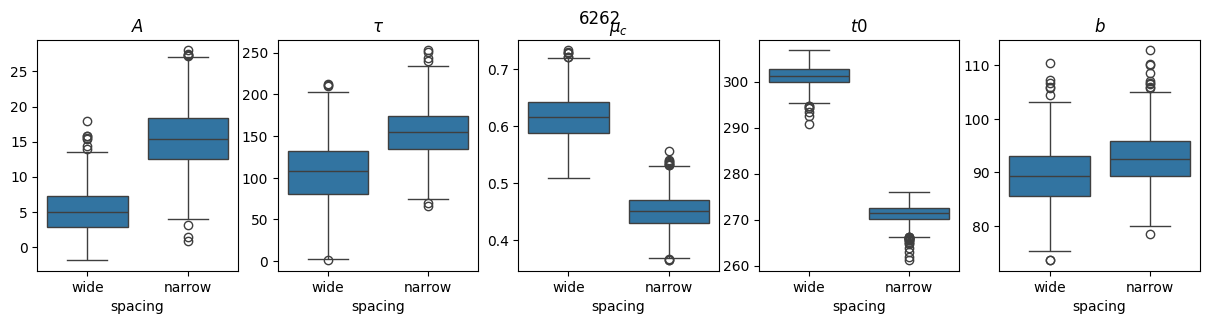

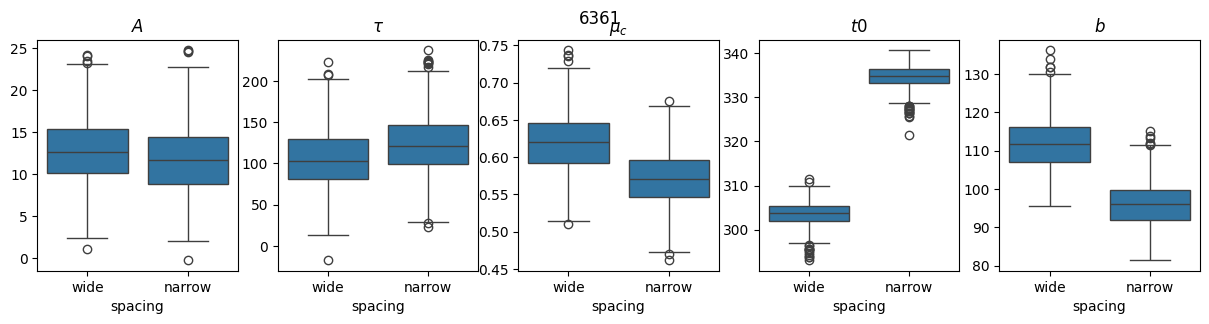

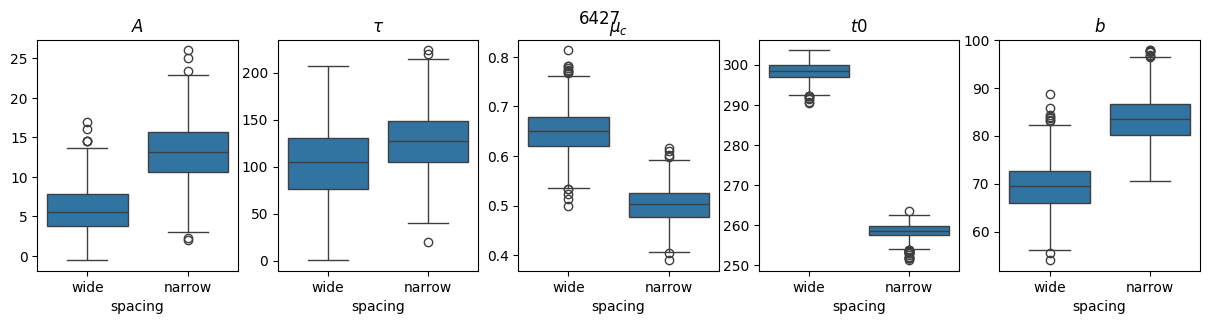

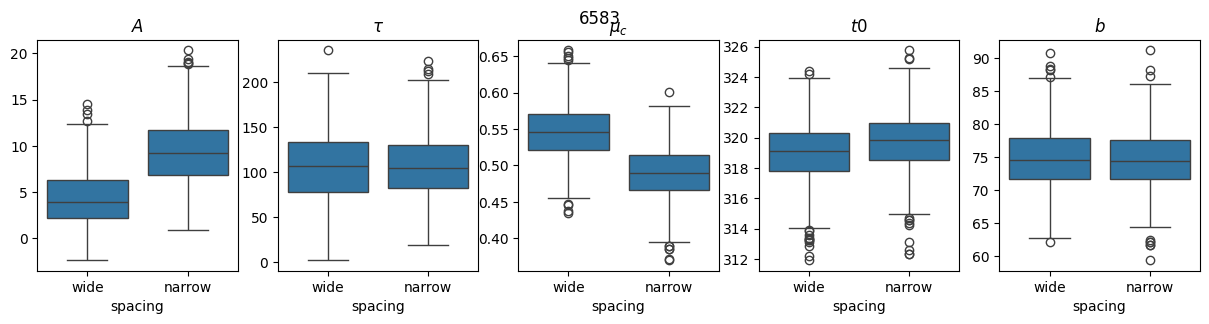

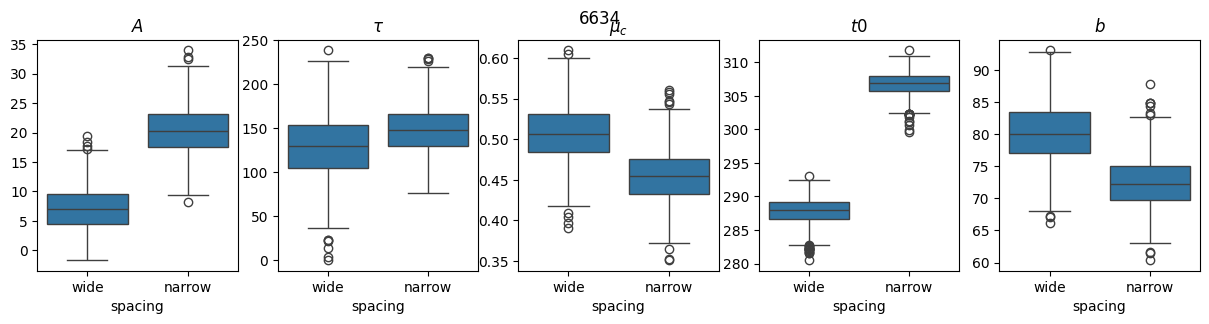

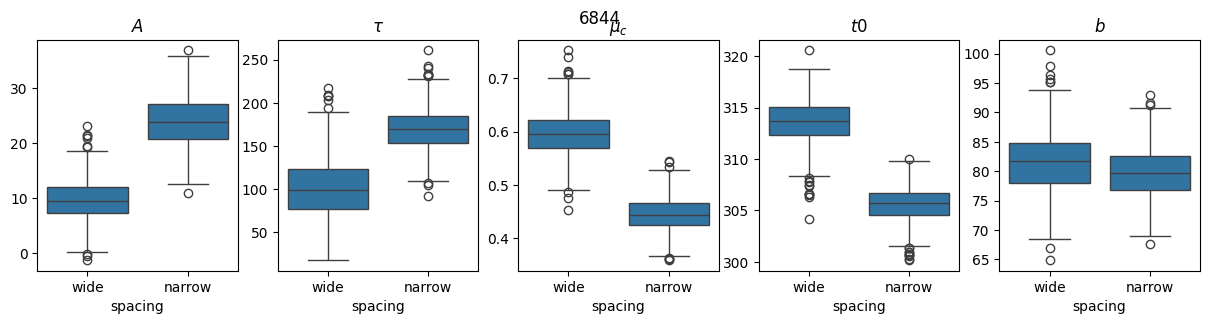

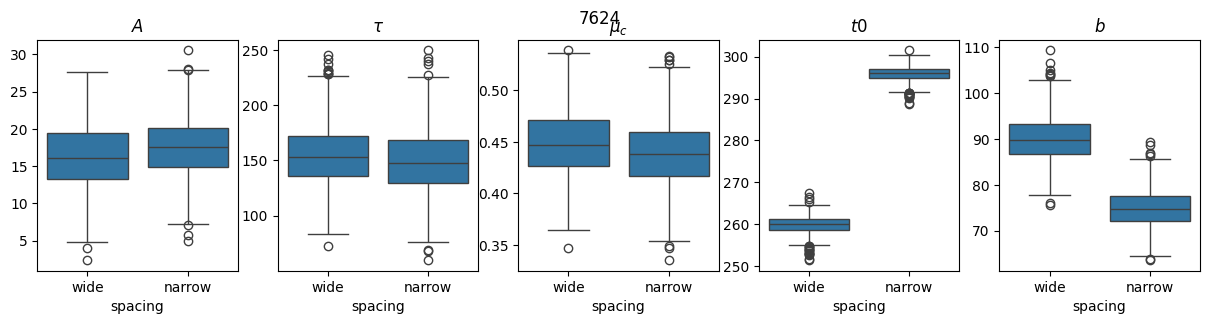

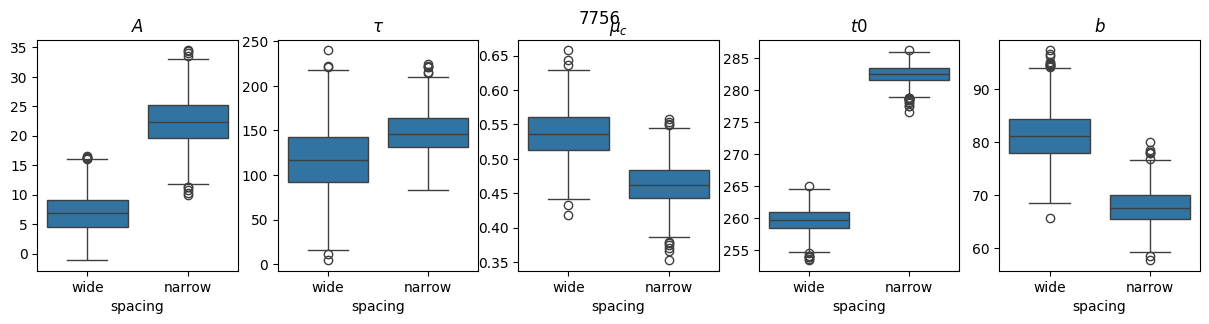

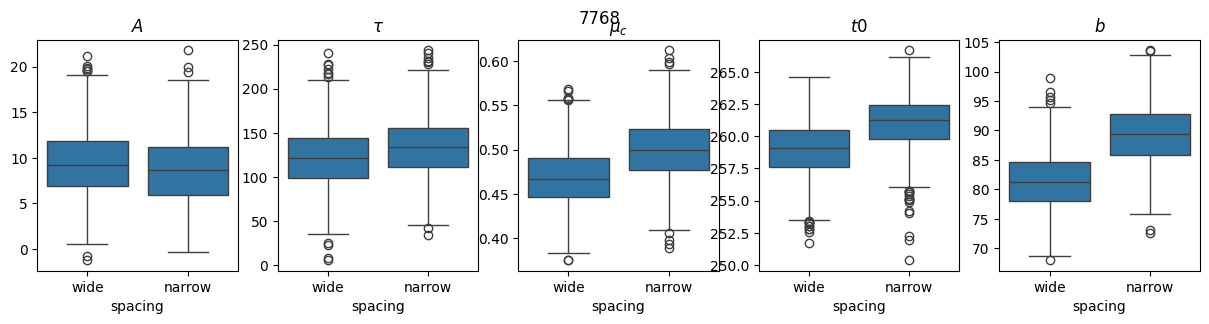

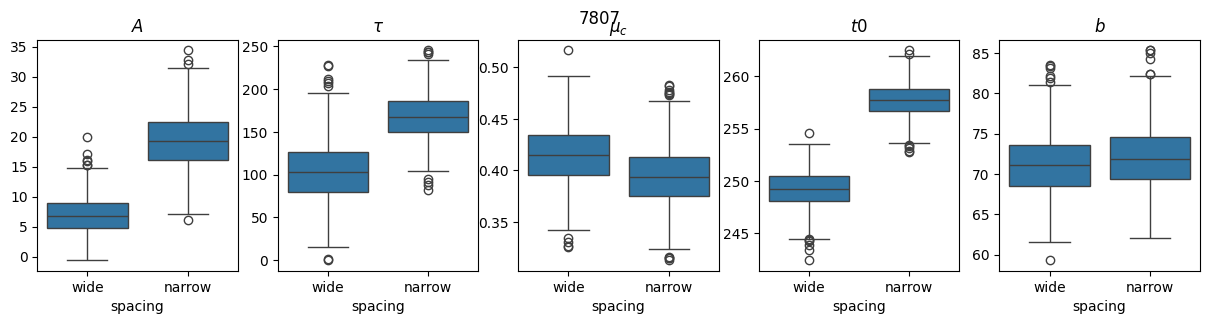

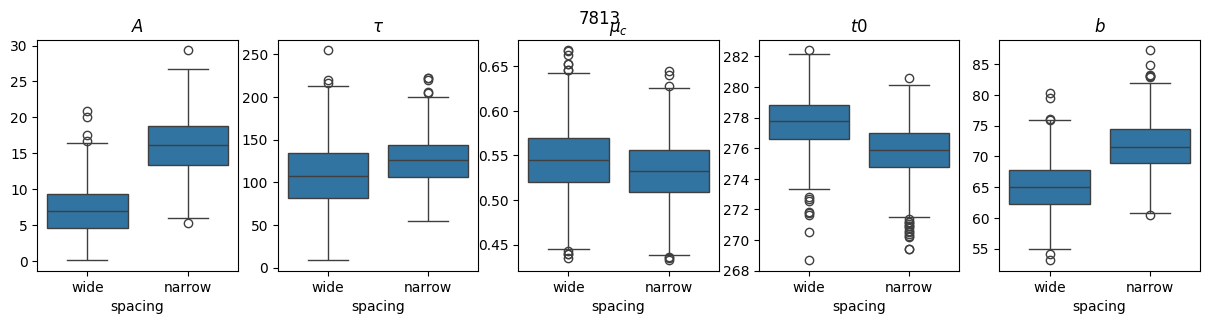

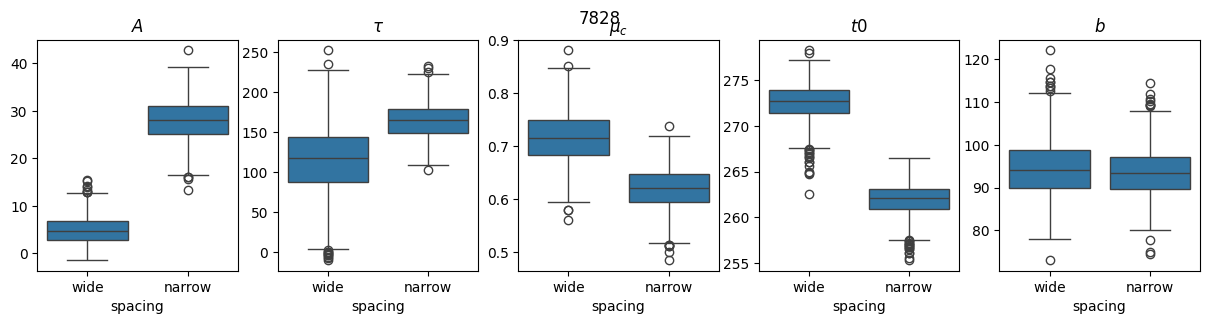

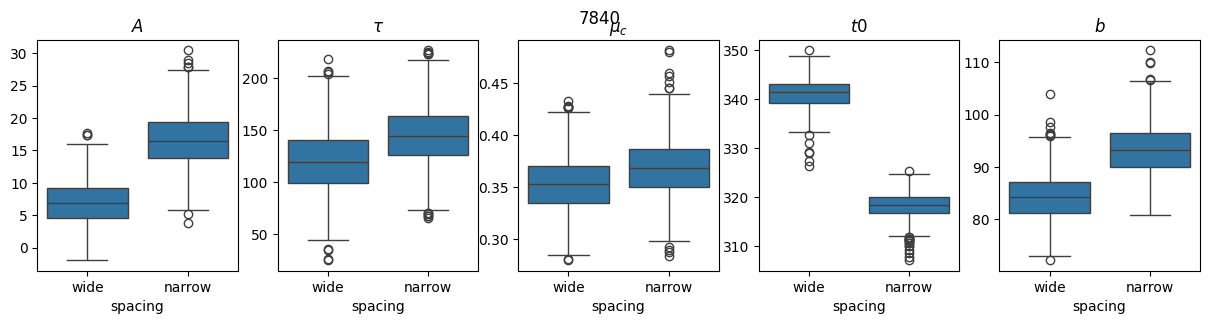

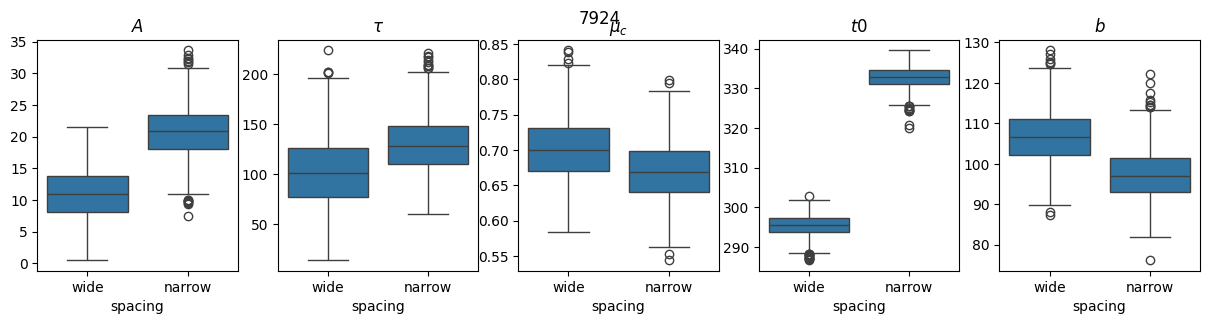

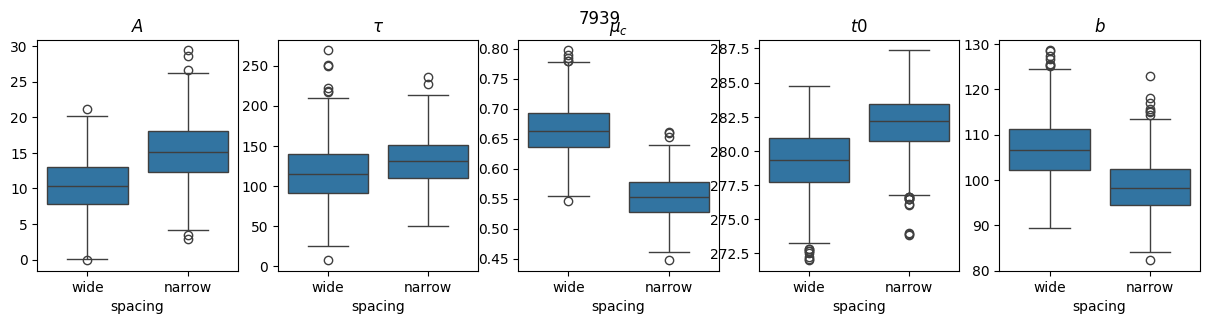

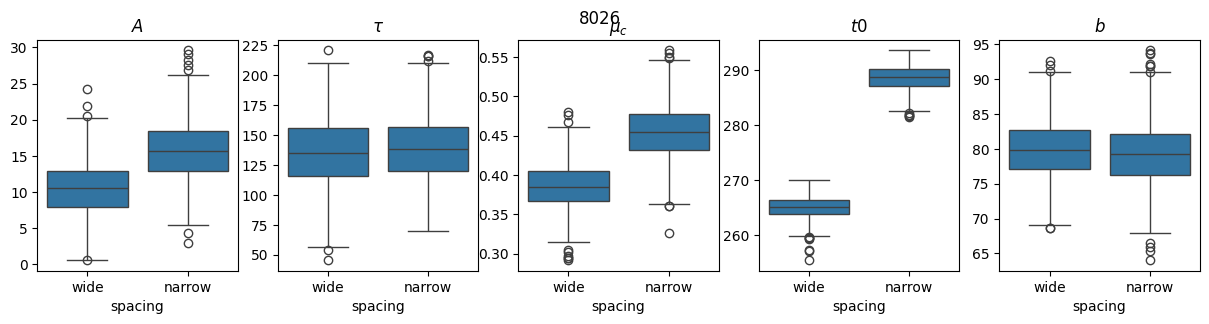

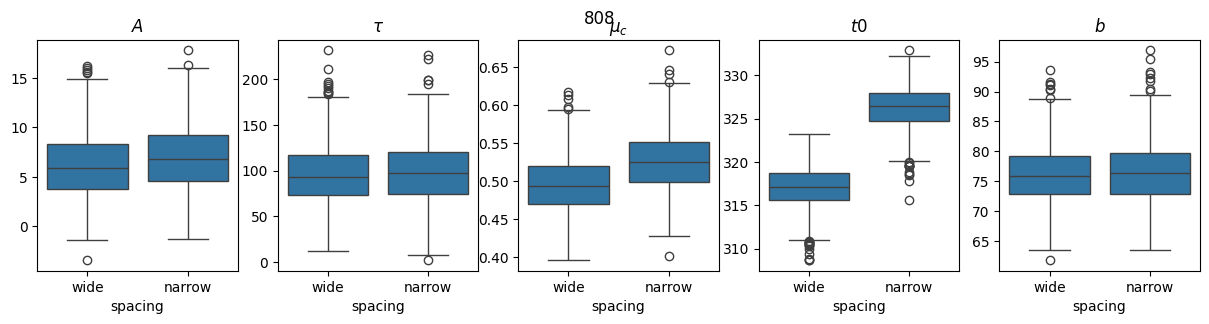

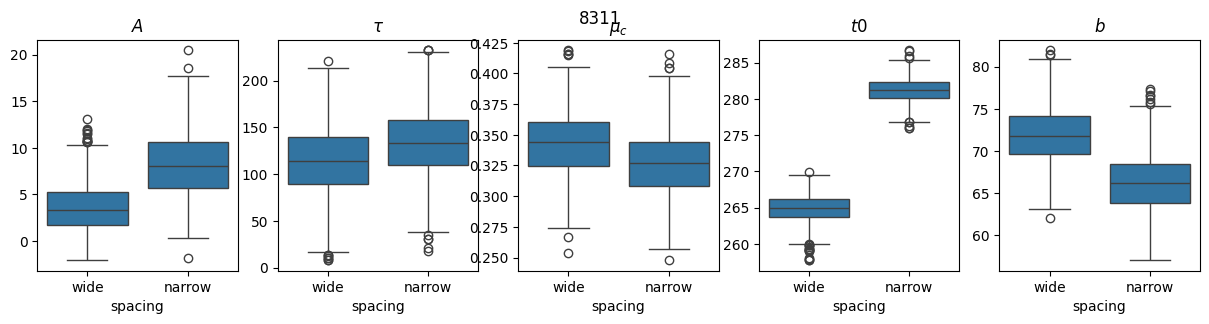

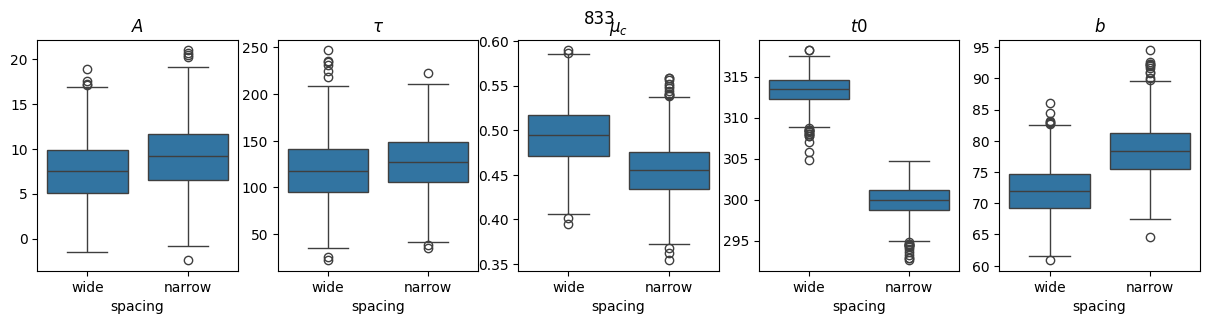

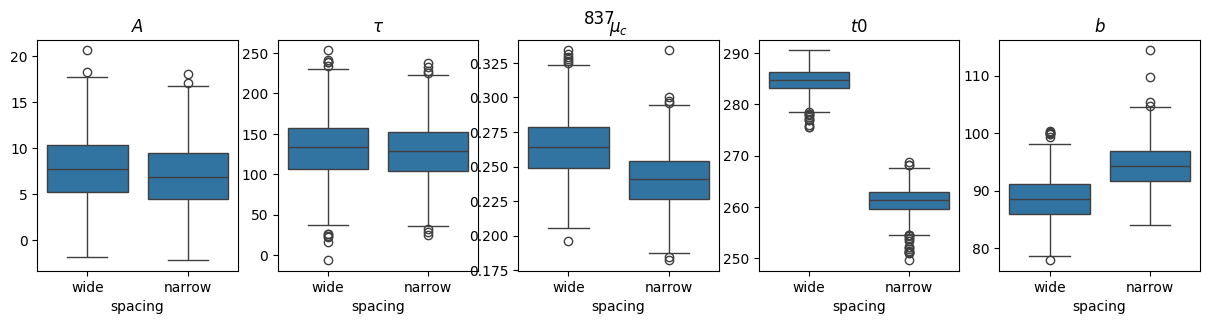

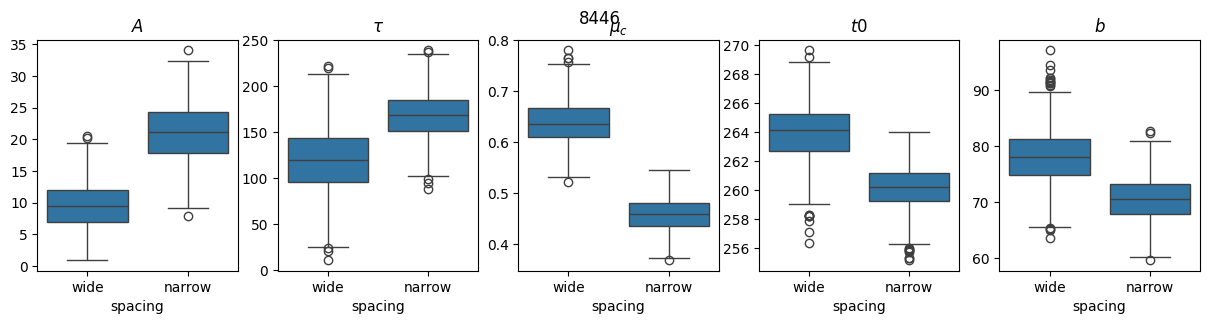

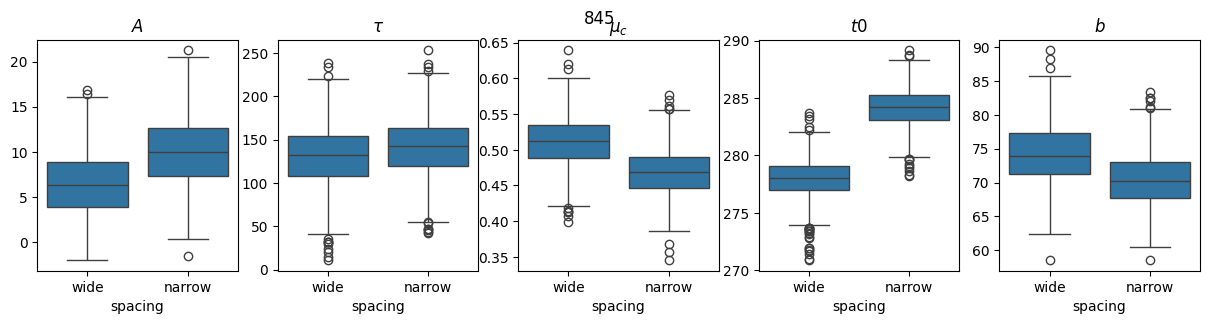

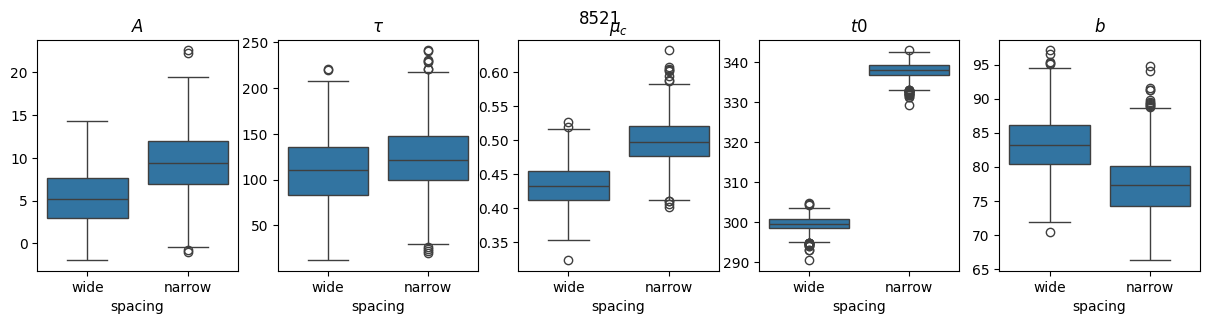

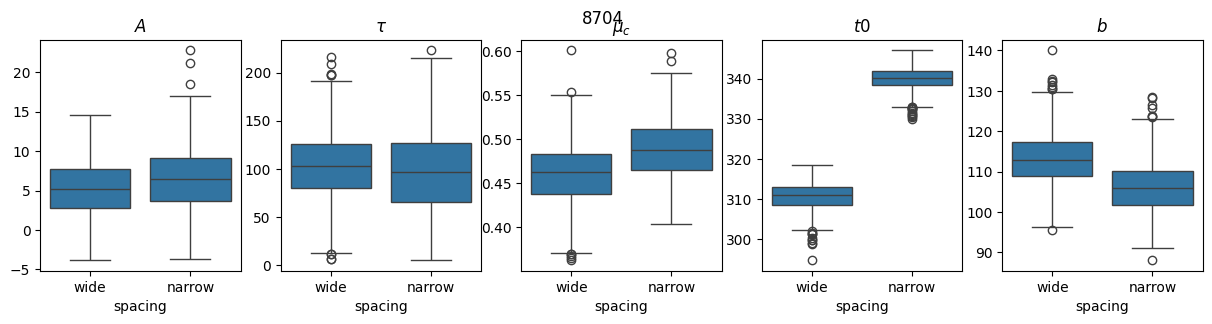

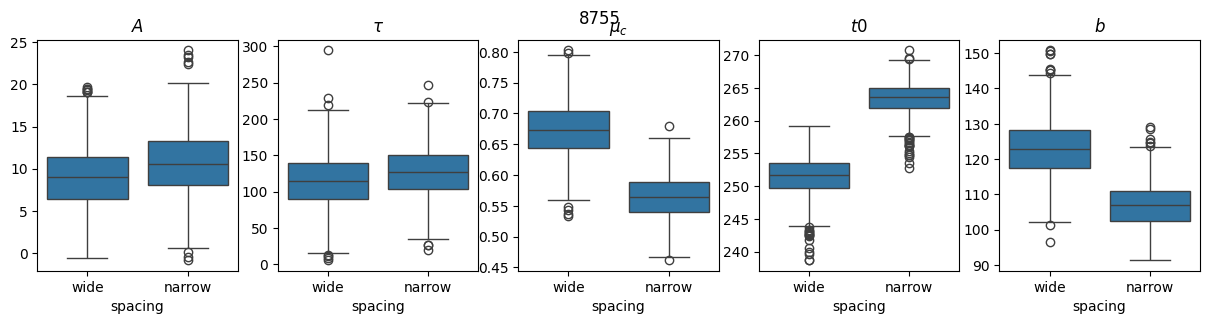

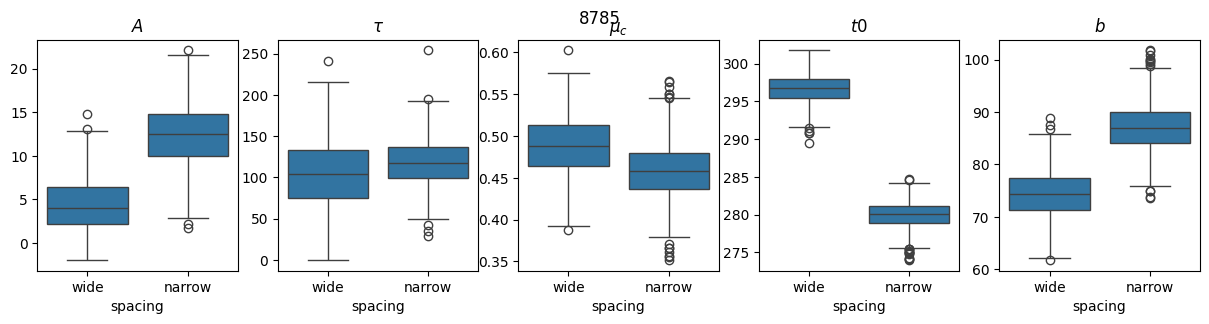

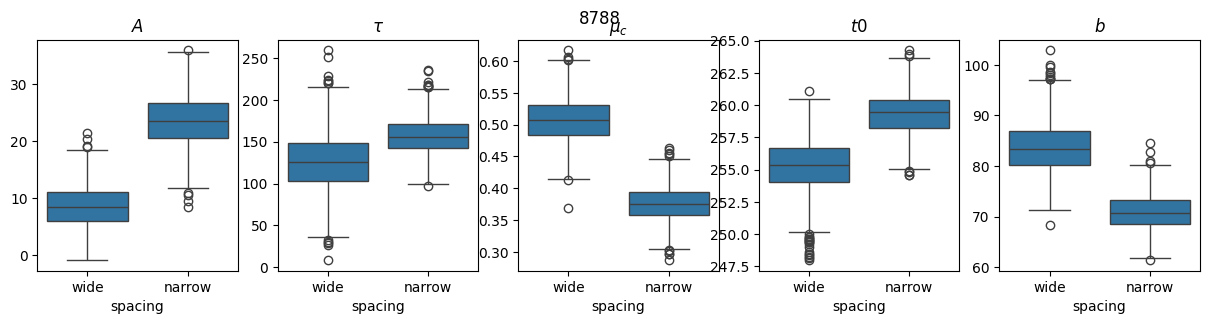

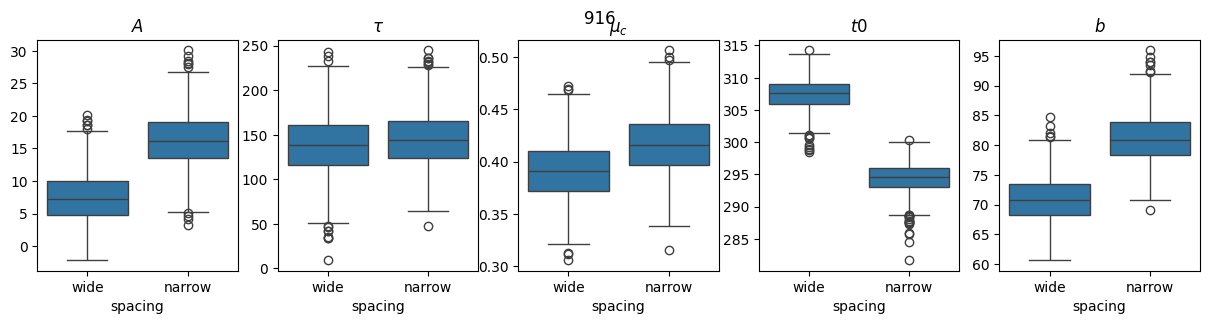

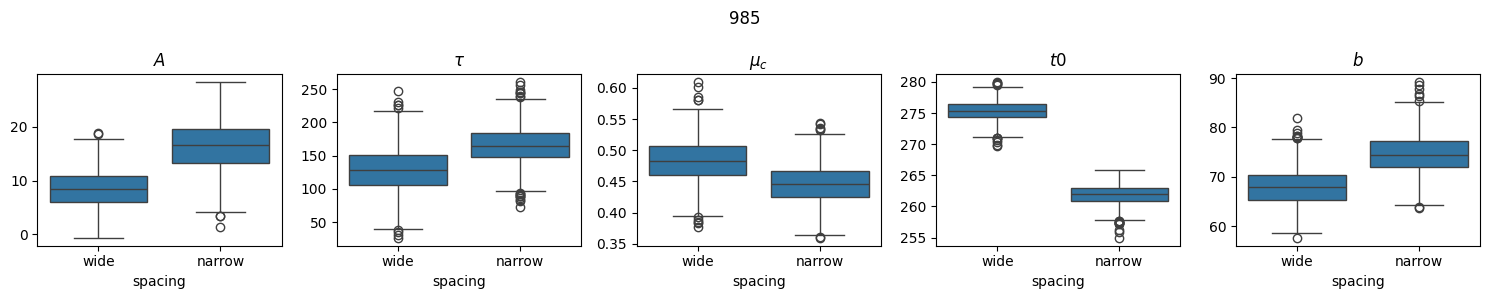

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

param_names = ["A", "tau", "mu_c", "t0", "b"]

for i, part in enumerate(parts):
    
    fig, axes = plt.subplots(1,5, figsize=(15,3))

    for p, ax in zip(param_names, axes):
        
        part_data = data_complete[data_complete["participant"]==part]
        
        sns.boxplot(part_data, ax=ax, x="spacing", y=p)
        ax.set_ylabel("")

        suff = "$\\" if p in ["tau", "mu_c"] else "$"

        label = suff + p + "$"

        ax.set_title(label)
        
        # ax.set_xlabel(p)
    
    fig.suptitle(str(part))
        
fig.tight_layout()